In [2]:
%load_ext pyinstrument
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
import ariel_load
import tqdm

local


In [3]:
#%%pyinstrument
train_data = kgs.load_all_train_data()
test_data = kgs.load_all_test_data()
len(train_data), len(test_data)

(1099, 1)

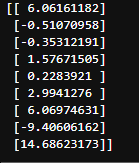

[[  6.06161182]
 [ -1.26225138]
 [ -1.49378687]
 [  2.30986778]
 [ -0.87824608]
 [  2.583951  ]
 [  6.06301123]
 [-10.52901774]
 [ 14.86668065]]


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/cupyx/scipy/sparse/_compressed.py:548: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive.
  warnings.warn('Changing the sparsity structure of a '


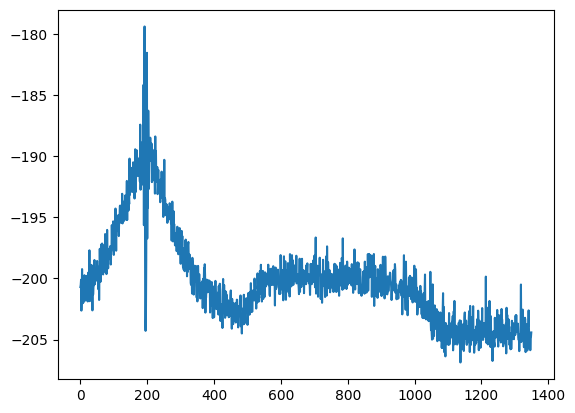

{'main': CompoundNamed(comment='.signal.main')}


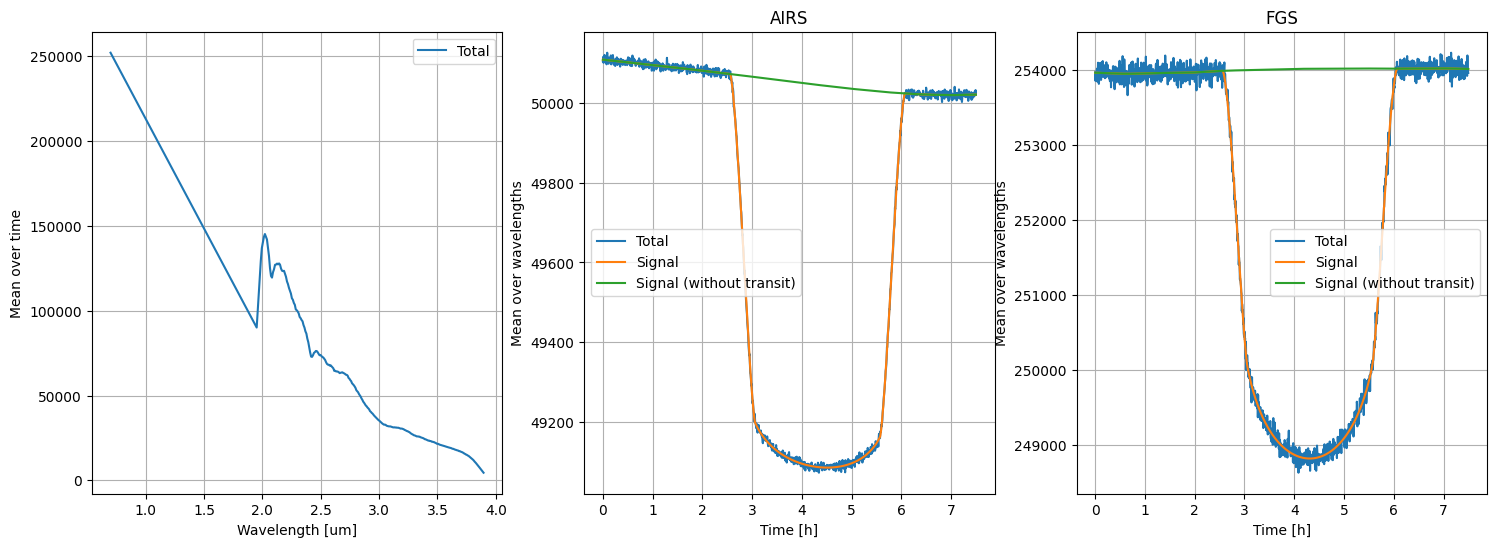

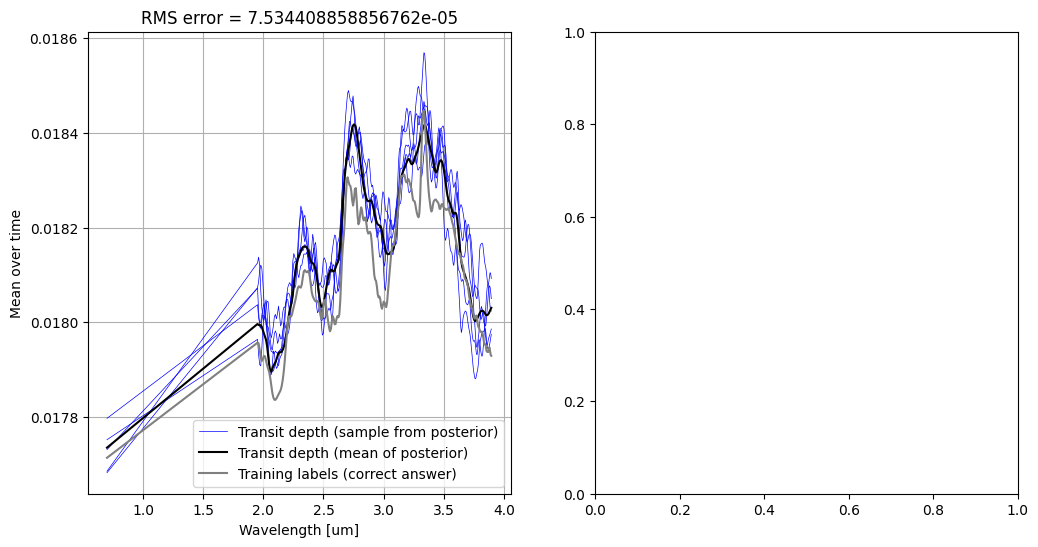

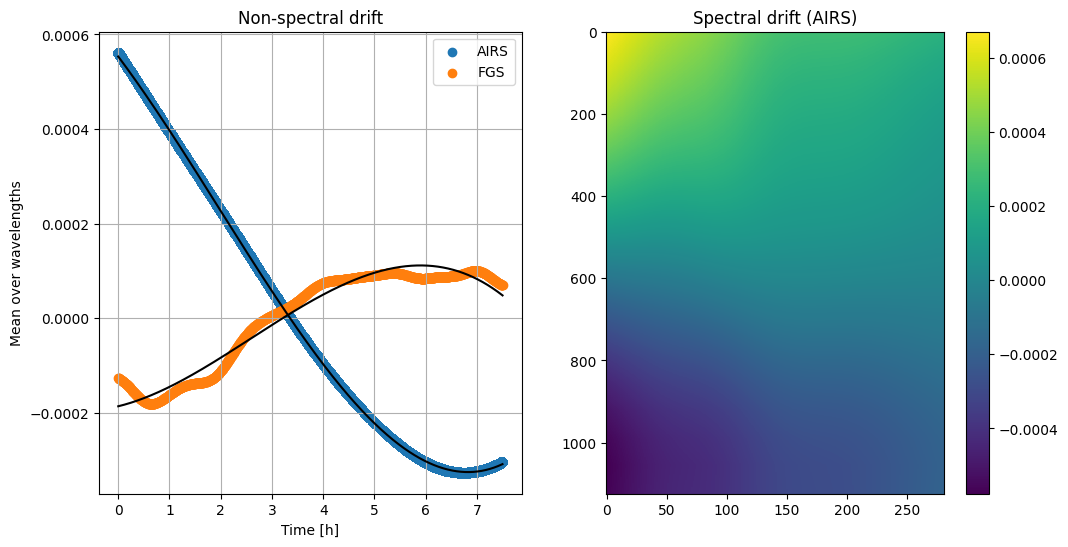

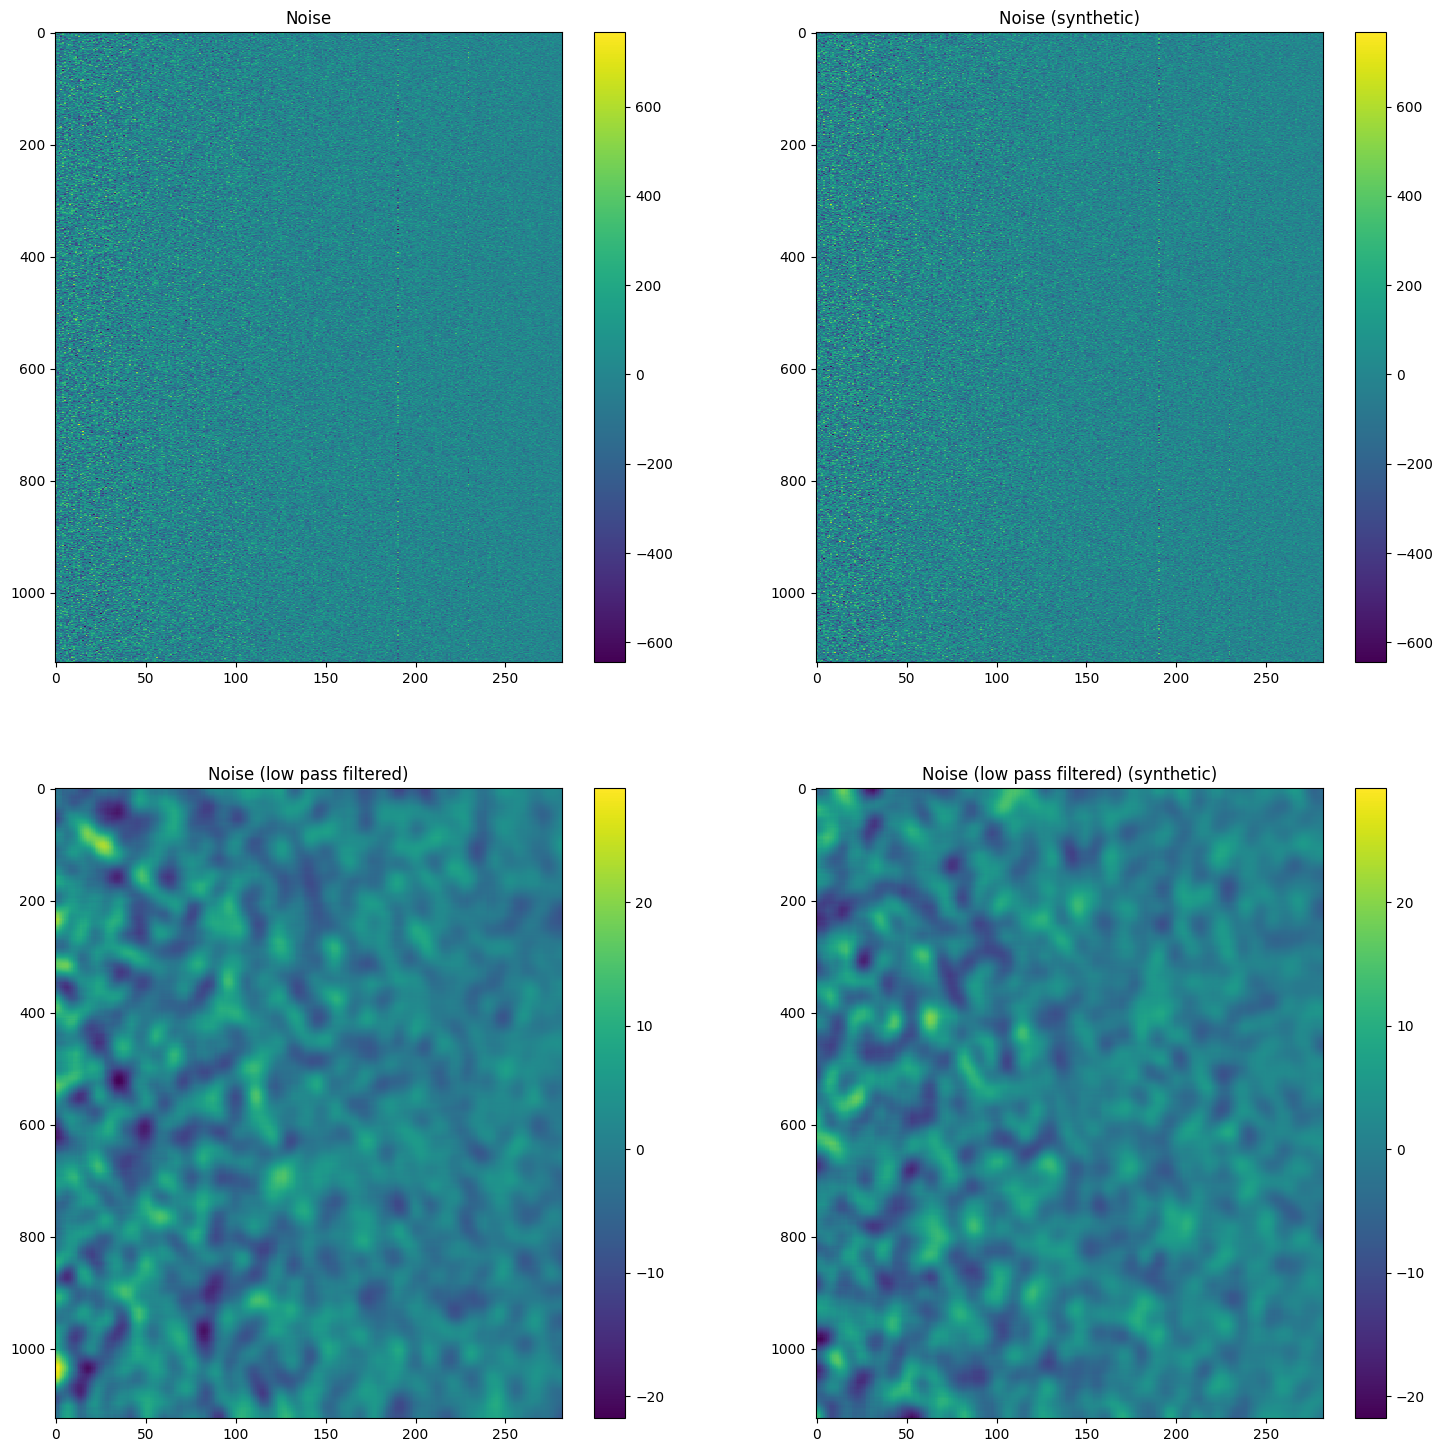

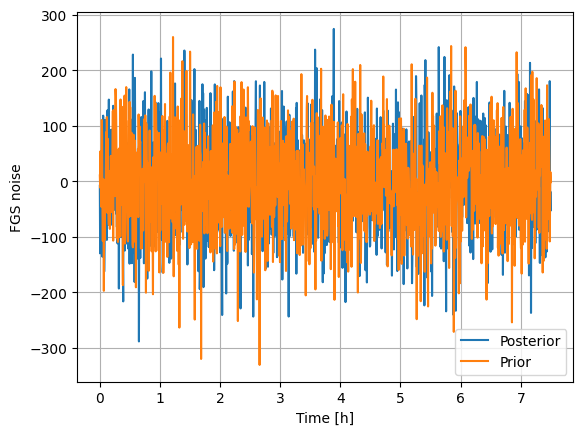

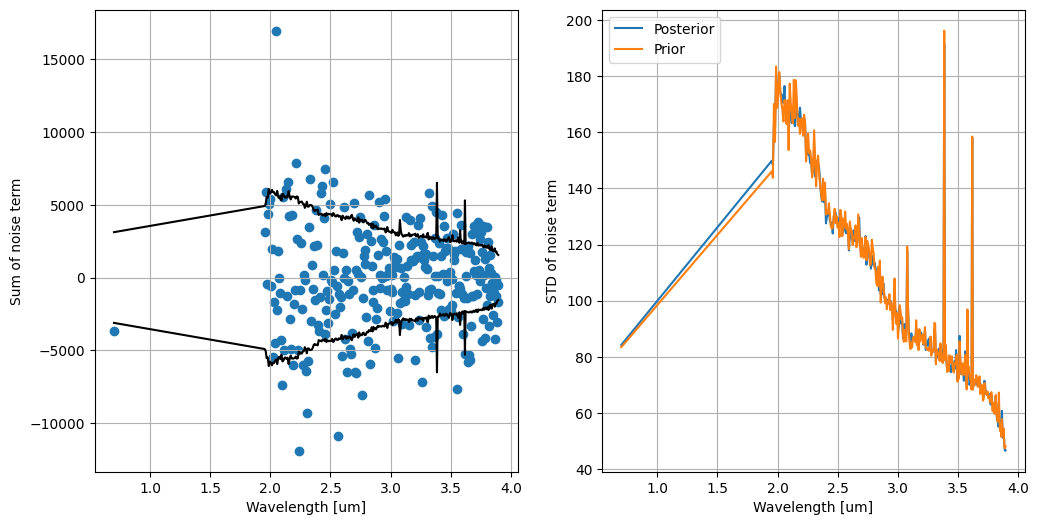

Score:          0.1857
RMS error FGS:  21.40 ppm
RMS error AIRS: 75.47 ppm


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/cupyx/scipy/sparse/_compressed.py:548: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive.
  warnings.warn('Changing the sparsity structure of a '


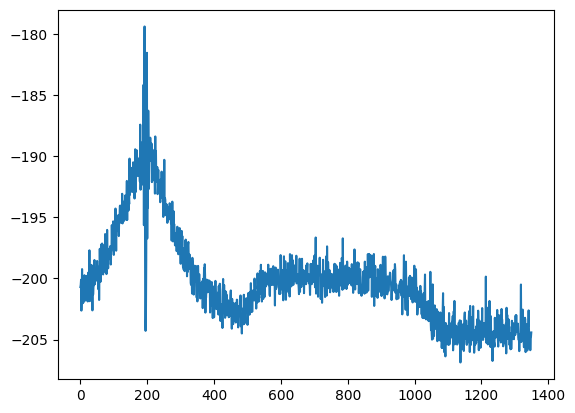

Score:          -0.1809
RMS error FGS:  41.06 ppm
RMS error AIRS: 138.74 ppm
CPU times: user 32.8 s, sys: 4.99 s, total: 37.8 s
Wall time: 36.1 s


(-0.18089817685906023, 4.1055887310948586e-05, 0.00013873945684895057)

In [43]:
%%time
import gp
import ariel_gp
import ariel_load_FGS
importlib.reload(ariel_load_FGS)
importlib.reload(ariel_load)
kgs.profiling=False
kgs.debugging_mode=1
kgs.sanity_checks_active=False
importlib.reload(gp)
importlib.reload(ariel_gp)
model = ariel_gp.PredictionModel()  
model.run_in_parallel=False
model.model_options.use_training_labels = False
model.starter_model.do_plots = False
model.plot_final = True
model.plot_simple = False
model.model_options.include_background = False
model.train(train_data)
#model.starter_model.loaders[0].cache_steps = [5]

for ii in range(2):                
    pass
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca = True                 
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[3] = 10000
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[2] = 10000
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[4] = True
    #model.loaders[ii].apply_pixel_corrections.mask_hot = False
    #model.loaders[ii].apply_pixel_corrections.mask_hot = False
#model.loaders[1].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[1] = 1
#model.loaders[0].cache_steps = []
model.starter_model.loaders = model.loaders


loaders = model.starter_model.loaders
loaders[0].cache_steps= []
loaders[0].apply_wavelength_binning = ariel_load_FGS.ApplyWavelengthBinningFGS2()
loaders[0].apply_pixel_corrections.mask_hot = False
loaders[0].apply_full_sensor_corrections.inpainting_2d = False
loaders[0].apply_full_sensor_corrections.remove_background_based_on_pixels = False
#loaders[0].apply_wavelength_binning.options.use_sum = True
# loaders[1].apply_full_sensor_corrections.inpainting_wavelength = False
# loaders[1].apply_pixel_corrections.mask_hot = False
# loaders[1].apply_full_sensor_corrections.use_pca_for_background_removal = False
# loaders[1].apply_full_sensor_corrections.remove_background_based_on_rows = False
# loaders[1].apply_full_sensor_corrections.remove_background_remove_used_rows = False
# loaders[1].apply_wavelength_binning = ariel_load.ApplyWavelengthBinningAIRS2()
# loaders[1].apply_wavelength_binning.make_diagnostic_plots = False
# loaders[1].apply_wavelength_binning.residual_threshold = np.inf
# loaders[1].apply_wavelength_binning.sequential_fit = True


            
#model.loaders[0].cache_steps = [5]
data = [train_data[[d.planet_id for d in train_data].index(1843015807)]] # ingress and egress obscured
1349926825
#data = train_data[1:2]
data = [train_data[[d.planet_id for d in train_data].index(1349926825)]]
data = train_data[136:137]
#data = [train_data[[d.planet_id for d in train_data].index(2270815333)]] # ingress and egress obscured
for d in data:
    d.load_to_step(0,model.loaders)
inferred_data = model.infer(data)
kgs.score_metric(inferred_data, data)
model.starter_model.do_plots = False
inferred_data_simple = model.starter_model.infer(data)
kgs.score_metric(inferred_data_simple, data)

555340692

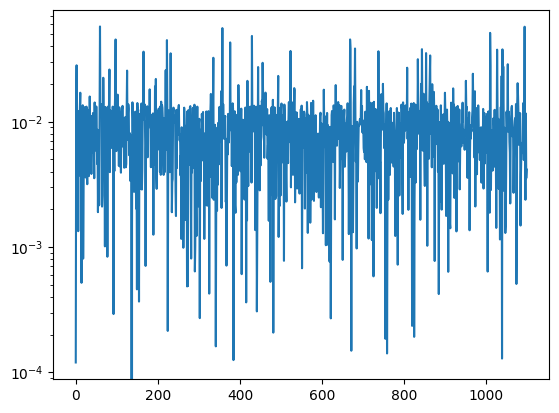

In [37]:
plt.figure()
td = kgs.load_all_train_data()
plt.semilogy([kgs.rms(inferred_data[0].spectrum - d.spectrum) for d in td])
td[np.argmin([kgs.rms(inferred_data[0].spectrum - d.spectrum) for d in td])].planet_id

/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/cupyx/scipy/sparse/_compressed.py:548: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive.
  warnings.warn('Changing the sparsity structure of a '


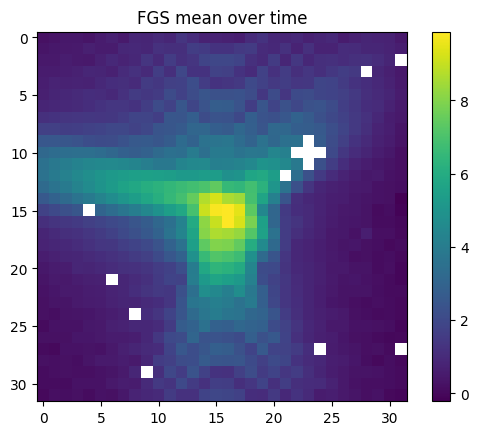

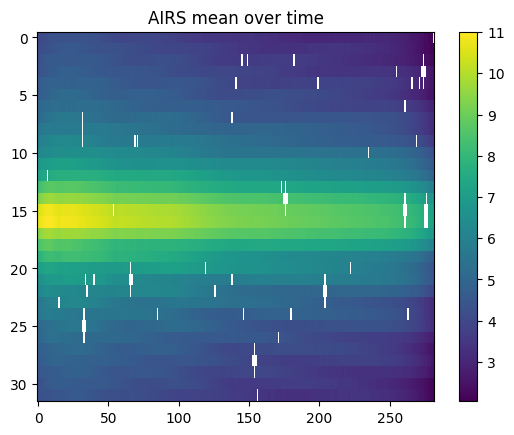

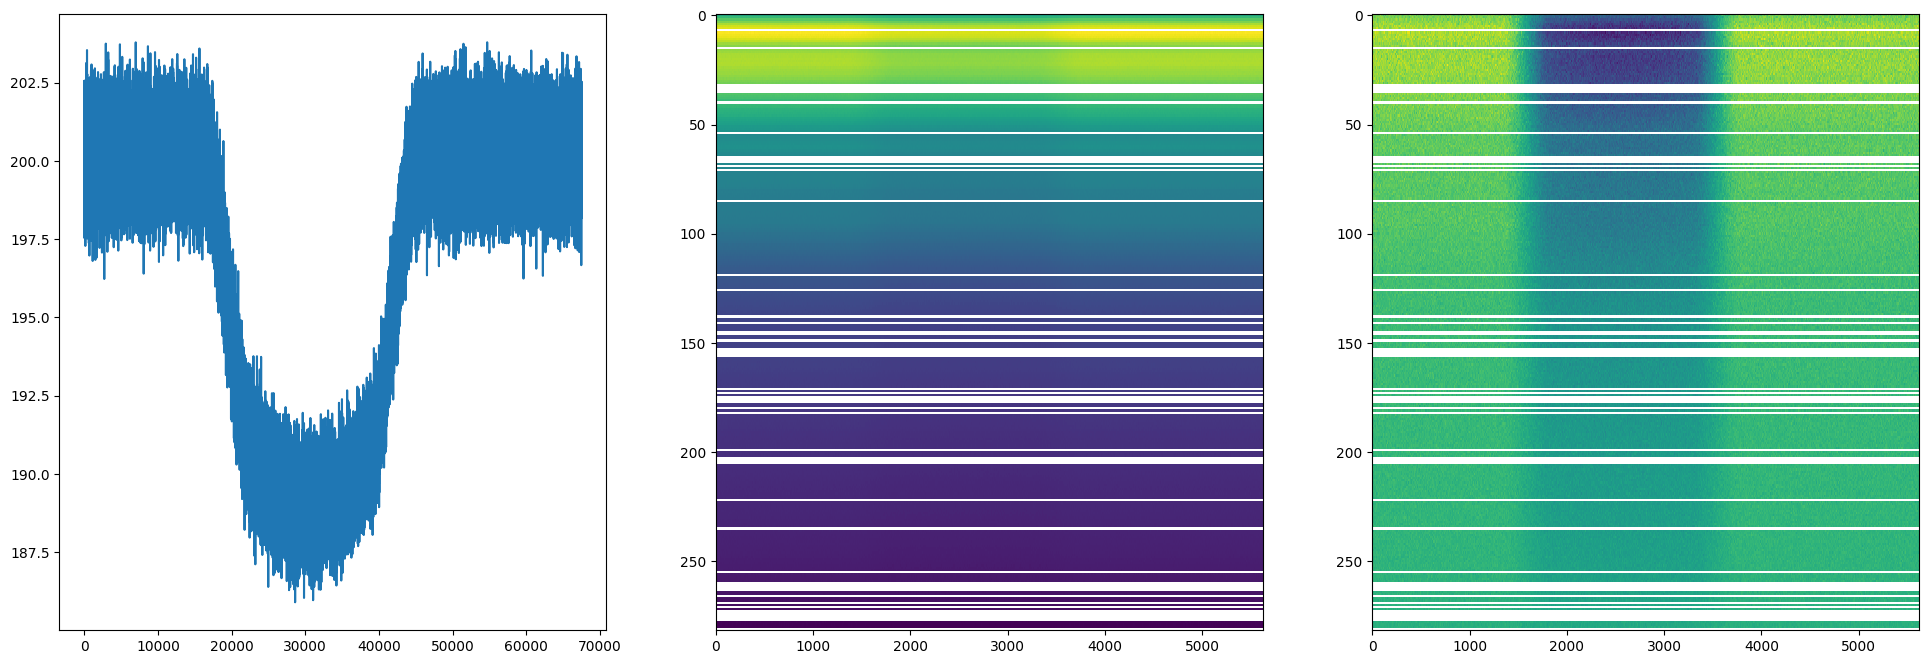

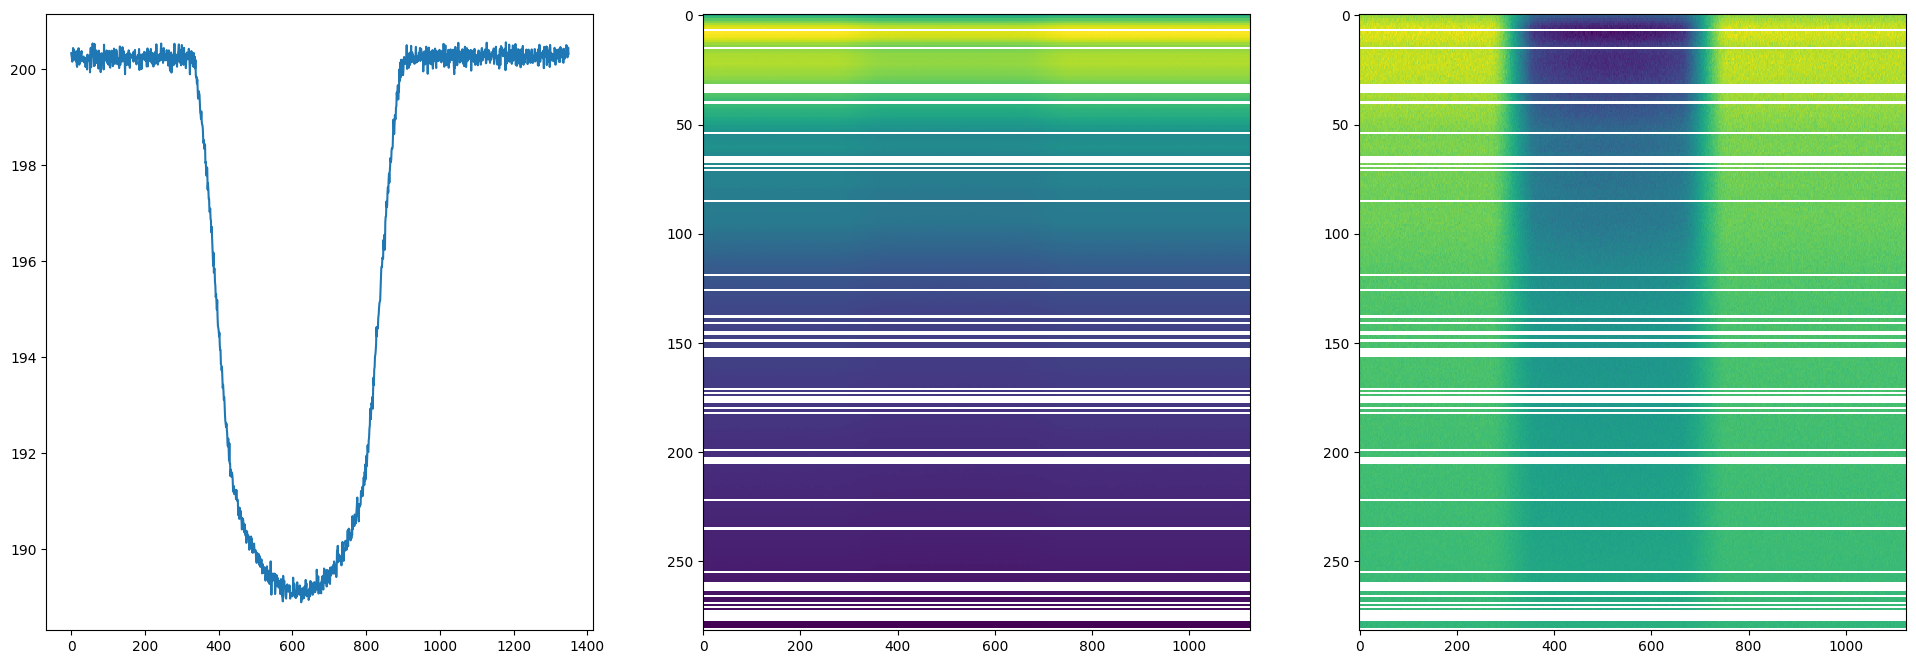

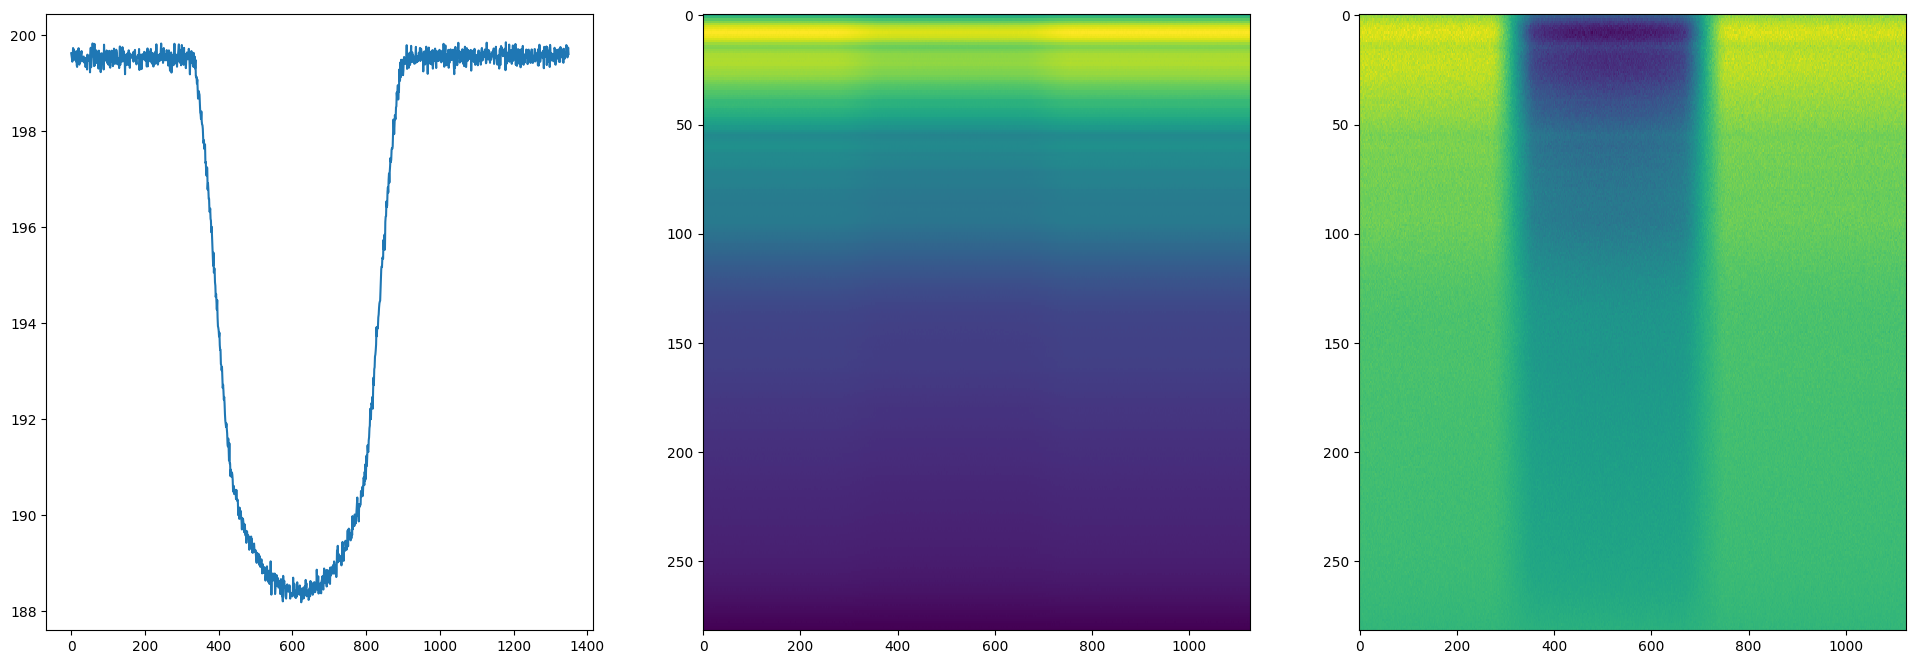

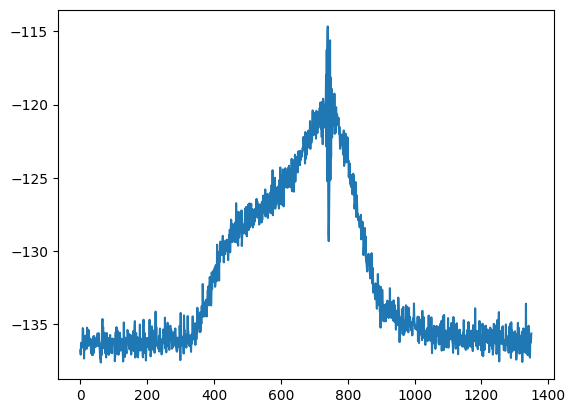

In [19]:
importlib.reload(ariel_load)
loaders[0].apply_wavelength_binning = ariel_load_FGS.ApplyWavelengthBinningFGS2()
ariel_load.raw_data_diagnostics(data[0], 0, loaders)